# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right, s=30):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0, 0.1)), color='red')
    vis.add_point(points_left, s=s, color=['green'])
    vis.add_point(points_right, s=s, color=['orange'])
    vis.add_point(points_mid, s=s, color=['purple'])
    vis.show()

In [5]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

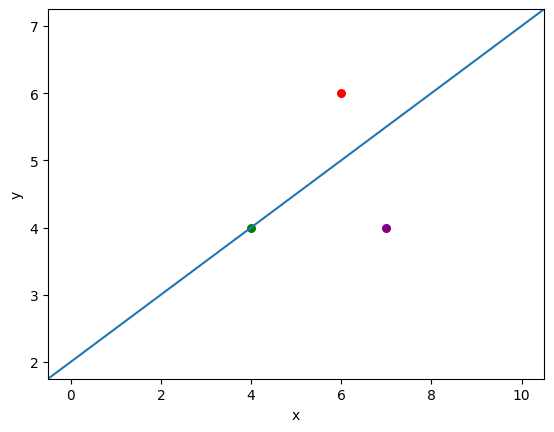

In [6]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funkcja biblioteczna)

In [7]:
def generate_uniform_points(left, right, n=10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left:  lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return [np.random.uniform(left, right, 2) for _ in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [8]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

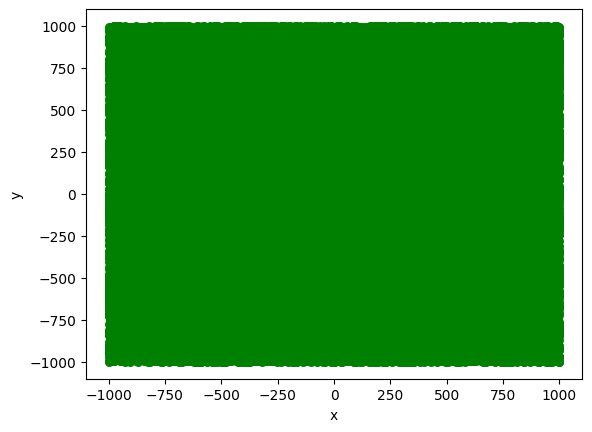

In [9]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [10]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

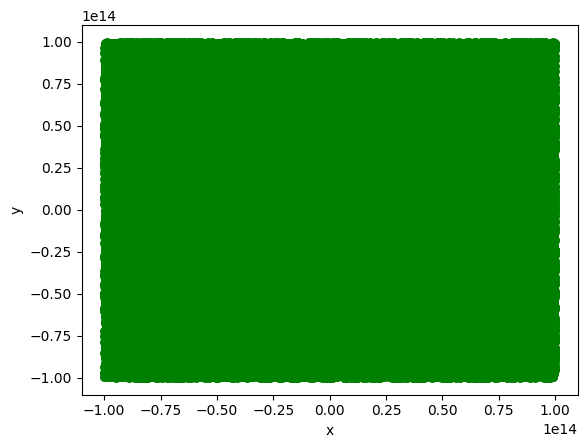

In [11]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [12]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    x0, y0 = O
    points = [None for _ in range(n)]
    for i in range(n):
        angle = np.random.uniform(0, 2 * np.pi)
        x = R*np.cos(angle)
        y = R*np.sin(angle)
        points[i] = (x0+x, y0+y)
    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [13]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

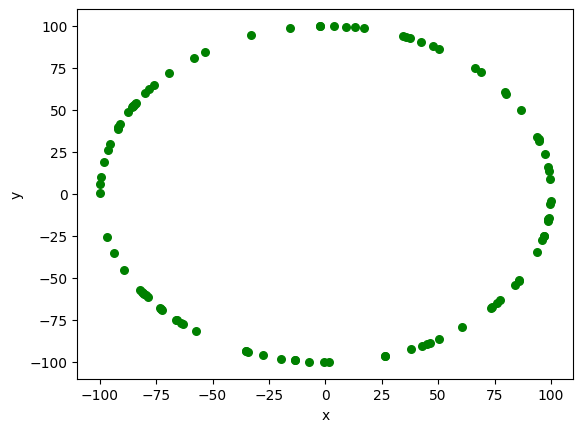

In [14]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [15]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    x1, y1 = a
    x2, y2 = b
    v = [x2-x1, y2-y1]
    x_range = 1000/v[0] if v[0] != 0 else 0
    def x(t): return x1 + t*v[0]
    def y(t): return y1 + t*v[1]
    def P(t): return (x(t), y(t))
    points = [None for _ in range(n)]
    for i in range(n):
        t = np.random.uniform(-x_range, x_range)
        points[i] = P(t)
    return points

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [16]:
points_d = generate_collinear_points((-1.0, 0.0), (1.0, 0.1))

Zwizualizuj wygenerowane punkty.

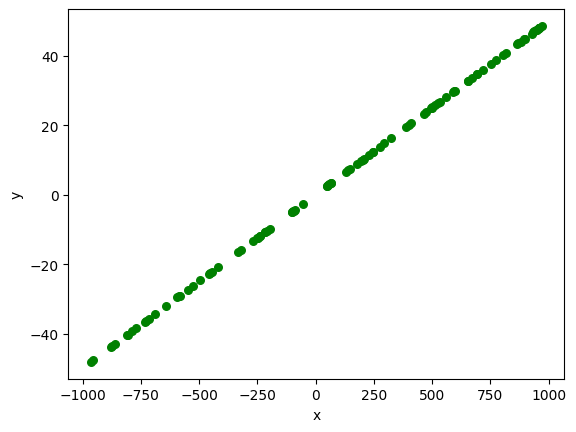

In [17]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [18]:
Test().runtest(1, generate_uniform_points,
               generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.729s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której stronie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [19]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    return (bx-ax)*(cy-by)-(by-ay)*(cx-bx)

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [20]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    mat = np.array([[*a, 1], [*b, 1], [*c, 1]])
    return (np.linalg.det(mat))

Uzupełnij funkcje ```mat_det_2x2```

In [ ]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax, ay = a
    bx, by = b
    cx, cy = c
    return (ax-cx)*(by-cy)-(ay-cy)*(bx-cx)

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [ ]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ab_mat = np.array([[*a], [*b]])
    c_mat = np.array([*c])
    mat = ab_mat-c_mat
    return round(np.linalg.det(mat))

Przetestujmy napisane powyżej funkcje.

In [ ]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [ ]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostej
    """
    result = [[], [], []]
    for c in points:
        det = mat_det_func(a, b, c)
        if abs(det) <= eps:
            result[1].append(c)
        elif det > eps:
            result[0].append(c)
        elif det < eps:
            result[2].append(c)
    return result

In [ ]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [ ]:
classified_points_a_left, classified_points_a_mid, classified_points_a_right = categorize_points(
    points_a, a, b, mat_det_3x3, 10 ** -12)

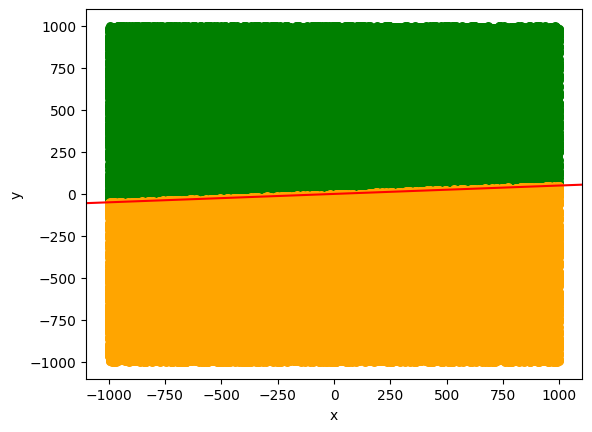

In [ ]:
draw_line(classified_points_a_left, classified_points_a_mid,
          classified_points_a_right)

In [ ]:
classified_points_b_left, classified_points_b_mid, classified_points_b_right = categorize_points(
    points_b, a, b, mat_det_3x3_lib, 10 ** -12)

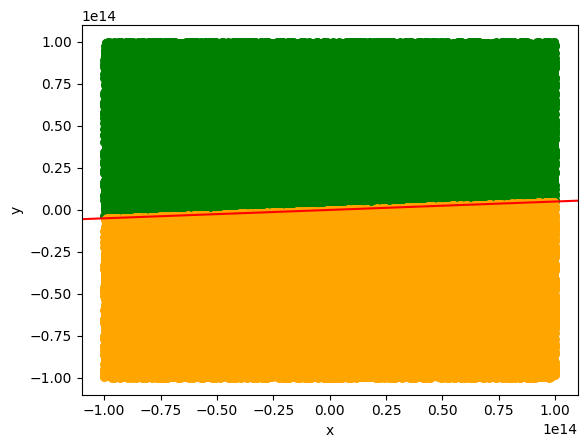

In [ ]:
draw_line(classified_points_b_left, classified_points_b_mid,
          classified_points_b_right)

In [ ]:
classified_points_c_left, classified_points_c_mid, classified_points_c_right = categorize_points(
    points_c, a, b, mat_det_2x2, 10 ** -12)

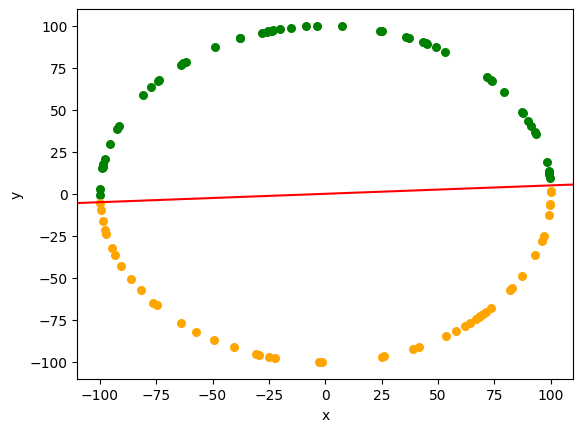

In [ ]:
draw_line(classified_points_c_left, classified_points_c_mid,
          classified_points_c_right)

In [ ]:
classified_points_d_left, classified_points_d_mid, classified_points_d_right = categorize_points(
    points_d, a, b, mat_det_2x2_lib, 10 ** -12)

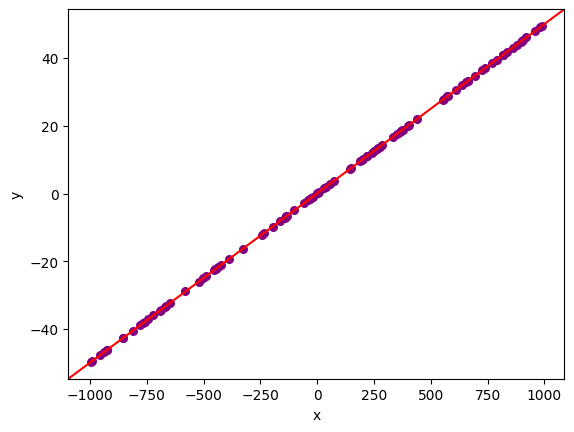

In [ ]:
draw_line(classified_points_d_left, classified_points_d_mid,
          classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [ ]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [ ]:
points_e = generate_uniform_points(-1, 1, 5000)

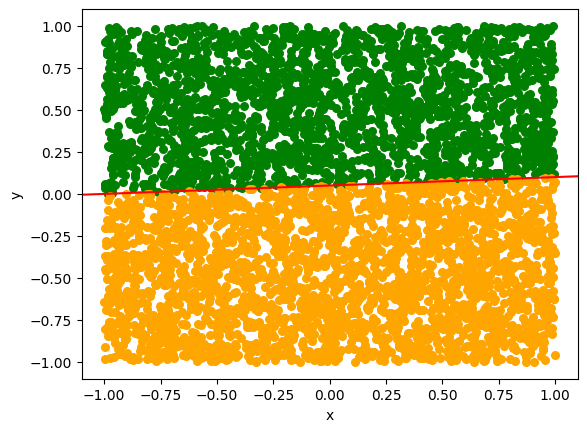

In [ ]:

classified_points_a_left, classified_points_a_mid, classified_points_a_right = categorize_points(
    points_e, a, b, mat_det_3x3, 10 ** -12)
draw_line(classified_points_a_left, classified_points_a_mid,
          classified_points_a_right)

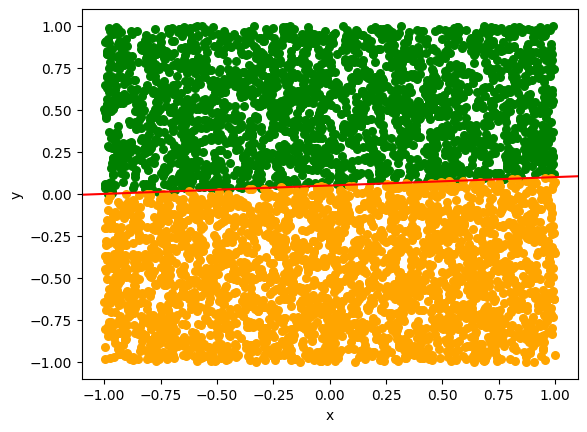

In [ ]:
points_e_float32 = np.float32(points_e)
classified_points_a_left, classified_points_a_mid, classified_points_a_right = categorize_points(
    points_e_float32, a, b, mat_det_3x3, 10 ** -12)
draw_line(classified_points_a_left, classified_points_a_mid,
          classified_points_a_right)

Wniosek: punkty w postaci float32 są znacznie rzadziej rozmieszczone mimo tej samej ilości punktów. Wynika to z mniejszej ilości bitów na zapisanie liczby, co powoduje, że liczby są bardziej zaokrąglone. W przypadku float64 liczby są bardziej dokładne, co powoduje, że punkty są bardziej rozmieszczone.

DO ZROBIENIA

porównanie 4 setów punktów (a,b,c,d) przez 4 wyznaczniki 2x2, 2x2lib, 3x3, 3x3lib

eps = 1e-14 <br>
eps = 1e-12 <br>
eps = 1e-10 <br>
eps = 1e-8 <br>


TESTY

In [ ]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

In [ ]:
epsilons = [1e-14, 1e-12, 1e-10, 1e-8]
dets = [("mat_det_2x2", mat_det_2x2), ("mat_det_2x2_lib", mat_det_2x2_lib),
        ("mat_det_3x3", mat_det_3x3), ("mat_det_3x3_lib", mat_det_3x3_lib)]

In [ ]:
points_array = [generate_uniform_points(-10**3, 10**3, 10**5), generate_uniform_points(-10**14,
                                                                                       10**14, 10**5), generate_circle_points((0, 0), 5, 100), generate_collinear_points(a, b, 100)]

In [ ]:
def generateTableResult(points_arr, draw=False, save=False, desc=""):
    for p, points in enumerate(points_arr):
        arr_list = np.zeros((4, 4, 3)).astype(int)
        det_names = [i[0] for i in dets]
        for e, eps in enumerate(epsilons):
            arr = []
            for _, det in dets:
                categorizedPoints = categorize_points(points, a, b, det, eps)
                if draw:
                    draw_line(*categorizedPoints)
                arr.append(np.array([len(i) for i in categorizedPoints]))
            arr_list[e] = np.array(arr)
        labels = [f"eps={str(e)}" for e in epsilons]
        df_list = []
        for i, arr in enumerate(arr_list):
            df = pd.DataFrame(arr, columns=["left", "middle", "right"])
            df = df.set_index(pd.Index(det_names))
            df_list.append(df)
        df_concat = pd.concat(df_list, keys=labels)
        if save:
            df_concat.to_csv(fr'./out{p}{desc}.csv')
    return df_concat

In [ ]:
pd.DataFrame(points_array[0], columns=["X", "Y"]).head()

,X,Y
0,-516.998941,-42.115995
1,-101.606088,-237.696809
2,-329.710622,447.496114
3,349.864372,176.109603
4,-464.773818,-634.203472


In [ ]:
df = generateTableResult(points_array, save=True)

In [ ]:
points_array_float32 = [np.float32(np.array(points_array[i]))
                        for i in range(len(points_array))]

(100000, 2)

In [ ]:
df = generateTableResult(points_array_float32, save=True, desc="float32")

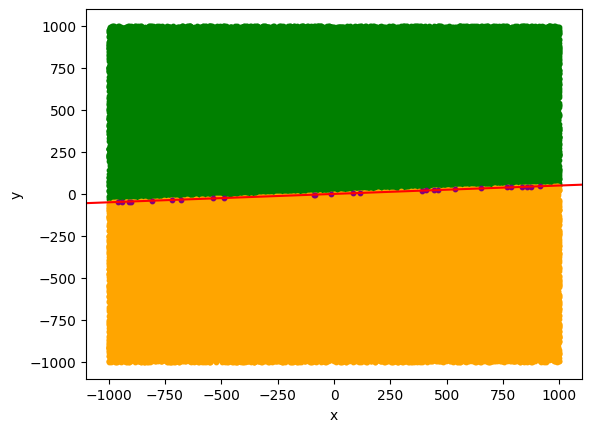

In [ ]:
draw_line(
    *categorize_points(points_array[0], a, b, mat_det_2x2_lib, 1e-12), s=10)

[(4.992271439318826, 0.2778954410592865),
 (4.999683008550362, 0.05630110134623085),
 (-4.997803966805019, -0.14817391601766636)]

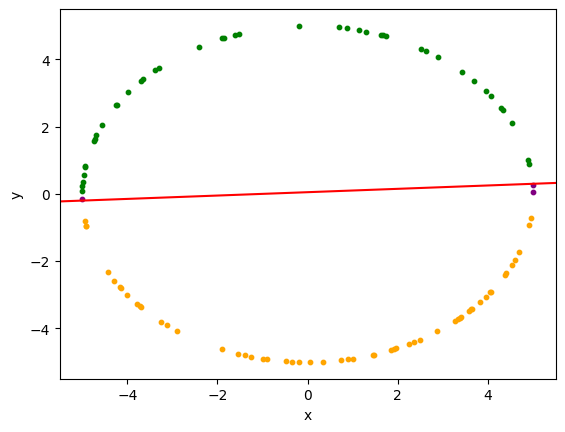

In [ ]:
draw_line(
    *categorize_points(points_array[2], a, b, mat_det_2x2_lib, 1e-12), s=10)
categorize_points(points_array[2], a, b, mat_det_2x2_lib, 1e-12)[1]

In [ ]:
print(points_array[3])

[(2.867872044036403, 0.19339360220182017), (-449.64566892847347, -22.432283446423675), (-157.66730157312588, -7.8333650786562945), (425.69614624847213, 21.334807312423607), (887.5721924262873, 44.428609621314365), (5.518787557595829, 0.32593937787979144), (-794.050204128752, -39.6525102064376), (926.4136566408924, 46.37068283204462), (921.933171145185, 46.14665855725926), (732.6372500522034, 36.68186250261017), (-768.2149527242434, -38.360747636212174), (716.0223105679684, 35.85111552839842), (455.4716716685548, 22.82358358342774), (-187.80304114528963, -9.340152057264481), (-794.9809722170912, -39.69904861085456), (533.8660035391645, 26.743300176958225), (-532.4949201075301, -26.574746005376507), (448.0452798737749, 22.452263993688746), (974.3703065708396, 48.76851532854198), (-995.1142797049097, -49.70571398524549), (-346.82756437374405, -17.291378218687203), (183.62732537453462, 9.231366268726731), (-945.7816648416197, -47.23908324208099), (-525.9439332433092, -26.24719666216546), (

In [ ]:
points0_float32 = np.array(points_array[0])
points0_float32 = np.float32(points0_float32)
points0_float32

array([[-635.20386,  170.97577],
       [-414.86234, -495.57098],
       [-261.036  ,  193.34625],
       ...,
       [ 409.58447, -454.47833],
       [-249.17339, -186.39458],
       [ 684.7503 , -721.4156 ]], dtype=float32)

In [ ]:
pd.DataFrame(points0_float32, columns=["X", "Y"]).head()

,X,Y
0,-635.203857,170.975769
1,-414.862335,-495.570984
2,-261.036011,193.346252
3,-101.495476,633.541931
4,-60.296364,833.273071


In [ ]:
df = generateTableResult(points0_float32)

[-10^14, 10^14]

In [ ]:
points1 = np.float64(points_array[1])
points1_float32 = np.float32(points1)

In [ ]:
pd.DataFrame(points1, columns=["X", "Y"]).head(5)

,X,Y
0,3.226085e+13,-3.942967e+13
1,6.370768e+12,-6.150539e+13
2,-3.490163e+13,6.689703e+13
3,-3.229016e+13,9.149537e+13
4,-4.235899e+13,-7.531128e+13


In [ ]:
pd.DataFrame(points1_float32, columns=["X", "Y"]).head(5)

,X,Y
0,3.226085e+13,-3.942967e+13
1,6.370768e+12,-6.150539e+13
2,-3.490163e+13,6.689703e+13
3,-3.229016e+13,9.149536e+13
4,-4.235899e+13,-7.531128e+13


In [ ]:
df = generateTableResult(points1)

In [ ]:
df = generateTableResult(points1_float32)

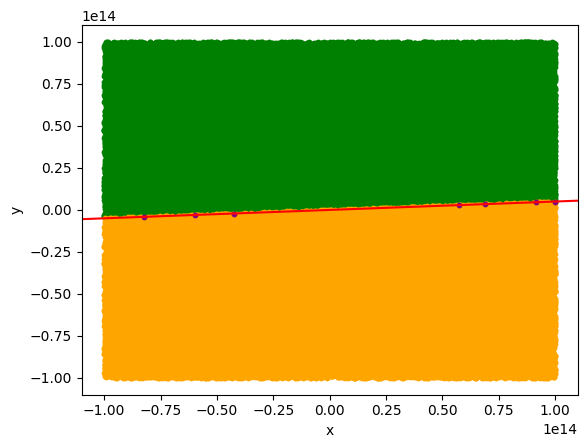

In [ ]:
temp = categorize_points(points1_float32, a, b, mat_det_2x2, 1e-14)
draw_line(*temp, s=10)

In [ ]:
points2 = np.float64(points_array[2])
points2_float32 = np.float32(points2)

In [ ]:
pd.DataFrame(points2_float32, columns=["X", "Y"]).head(5)

,X,Y
0,0.802751,-4.935138
1,3.927494,-3.094316
2,2.768390,4.163654
3,4.744562,1.577697
4,-4.980011,0.446646


In [ ]:
df = generateTableResult(points2)

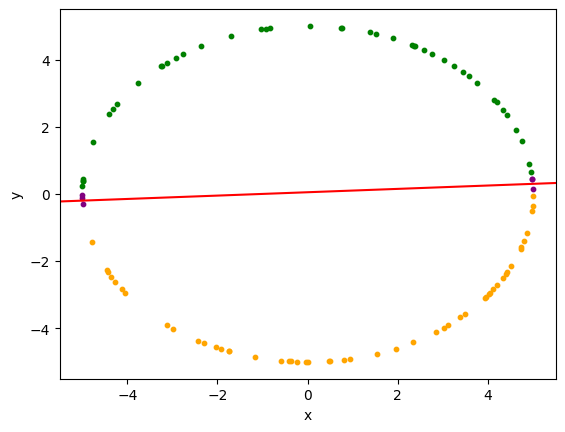

In [ ]:
temp = categorize_points(points2_float32, a, b, mat_det_2x2_lib, 1e-14)
draw_line(*temp, s=10)

In [ ]:
with open("liniowe") as file:
    pointsIN = []
    l = file.readline().strip()[1:-2].split(" ")
    for i in range(0, len(l), 2):
        pointsIN.append(((float(l[i][1:-1]), float(l[i+1][:-2]))))

['(2.867872044036403,', '0.19339360220182017),', '(-449.64566892847347,', '-22.432283446423675),', '(-157.66730157312588,', '-7.8333650786562945),', '(425.69614624847213,', '21.334807312423607),', '(887.5721924262873,', '44.428609621314365),', '(5.518787557595829,', '0.32593937787979144),', '(-794.050204128752,', '-39.6525102064376),', '(926.4136566408924,', '46.37068283204462),', '(921.933171145185,', '46.14665855725926),', '(732.6372500522034,', '36.68186250261017),', '(-768.2149527242434,', '-38.360747636212174),', '(716.0223105679684,', '35.85111552839842),', '(455.4716716685548,', '22.82358358342774),', '(-187.80304114528963,', '-9.340152057264481),', '(-794.9809722170912,', '-39.69904861085456),', '(533.8660035391645,', '26.743300176958225),', '(-532.4949201075301,', '-26.574746005376507),', '(448.0452798737749,', '22.452263993688746),', '(974.3703065708396,', '48.76851532854198),', '(-995.1142797049097,', '-49.70571398524549),', '(-346.82756437374405,', '-17.291378218687203),', 

In [ ]:
pointsIN_float = np.float32(np.array(pointsIN))

0 100 0


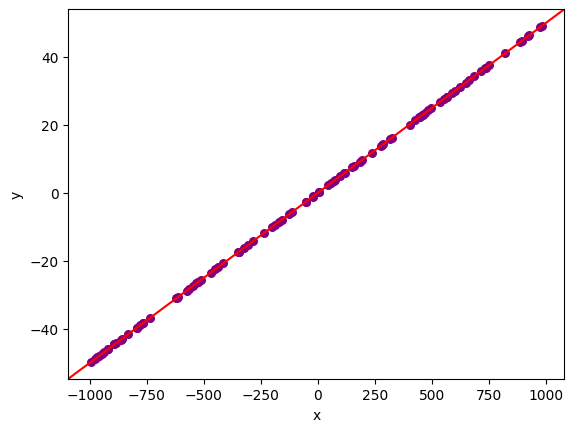

In [ ]:
p1, p2, p3 = categorize_points(pointsIN_float, a, b, mat_det_3x3, 1e8)
print(len(p1), len(p2), len(p3))
draw_line(*categorize_points(pointsIN_float, a, b, mat_det_3x3, 1e8))

In [ ]:
def generateTableResult2(points_arr, draw=False, save=False, desc=""):
    for p, points in enumerate(points_arr):
        if p != 3:
            continue
        arr_list = np.zeros((4, 4, 3)).astype(int)
        det_names = [i[0] for i in dets]
        for e, eps in enumerate(epsilons):
            arr = []
            for _, det in dets:
                categorizedPoints = categorize_points(points, a, b, det, eps)
                p1, p2, p3 = categorize_points(points, a, b, det, eps)
                if draw:
                    print(len(p1), len(p2), len(p3))
                    for k in p1[:5]:
                        print(k)
                    print()
                    for k in p2[:5]:
                        print(k)
                    print()
                    for k in p3[:5]:
                        print(k)
                    print()
                    print(p1[:5], p2[:5], p3[:5])
                    return p1[:5], p2[:5], p3[:5]
                    draw_line(*categorizedPoints, s=10)
                arr.append(np.array([len(i) for i in categorizedPoints]))
            arr_list[e] = np.array(arr)
        labels = [f"eps={str(e)}" for e in epsilons]
        df_list = []
        for i, arr in enumerate(arr_list):
            df = pd.DataFrame(arr, columns=["left", "middle", "right"])
            df = df.set_index(pd.Index(det_names))
            df_list.append(df)
        df_concat = pd.concat(df_list, keys=labels)
        if save:
            df_concat.to_csv(fr'./out{p}{desc}.csv')
    return df_concat

In [ ]:
POINTS = [[1], [1], [1], pointsIN]
generateTableResult2(POINTS, save=True)

left  middle  right
eps=1e-14 mat_det_2x2        13      75     12
          mat_det_2x2_lib     0     100      0
          mat_det_3x3         0      89     11
          mat_det_3x3_lib     3      91      6
eps=1e-12 mat_det_2x2         9      83      8
          mat_det_2x2_lib     0     100      0
          mat_det_3x3         0     100      0
          mat_det_3x3_lib     0     100      0
eps=1e-10 mat_det_2x2         0     100      0
          mat_det_2x2_lib     0     100      0
          mat_det_3x3         0     100      0
          mat_det_3x3_lib     0     100      0
eps=1e-08 mat_det_2x2         0     100      0
          mat_det_2x2_lib     0     100      0
          mat_det_3x3         0     100      0
          mat_det_3x3_lib     0     100      0

In [ ]:
POINTS_float = [[1], [1], [1], pointsIN_float]
to_check = generateTableResult2(POINTS_float, save=True, desc="abc", draw=True)

47 13 40
[2.867872  0.1933936]
[5.5187874 0.3259394]
[921.93317  46.14666]
[-187.80304    -9.340152]
[-794.98096   -39.699047]

[-794.05023  -39.65251]
[926.41364  46.37068]
[-768.21497  -38.36075]
[752.21045   37.660522]
[-778.39136   -38.869568]

[-449.64566   -22.432283]
[-157.6673     -7.833365]
[425.69614   21.334806]
[887.5722    44.428608]
[732.63727  36.68186]

[array([2.867872 , 0.1933936], dtype=float32), array([5.5187874, 0.3259394], dtype=float32), array([921.93317,  46.14666], dtype=float32), array([-187.80304 ,   -9.340152], dtype=float32), array([-794.98096 ,  -39.699047], dtype=float32)] [array([-794.05023,  -39.65251], dtype=float32), array([926.41364,  46.37068], dtype=float32), array([-768.21497,  -38.36075], dtype=float32), array([752.21045 ,  37.660522], dtype=float32), array([-778.39136 ,  -38.869568], dtype=float32)] [array([-449.64566 ,  -22.432283], dtype=float32), array([-157.6673  ,   -7.833365], dtype=float32), array([425.69614 ,  21.334806], dtype=float32),

0 100 0


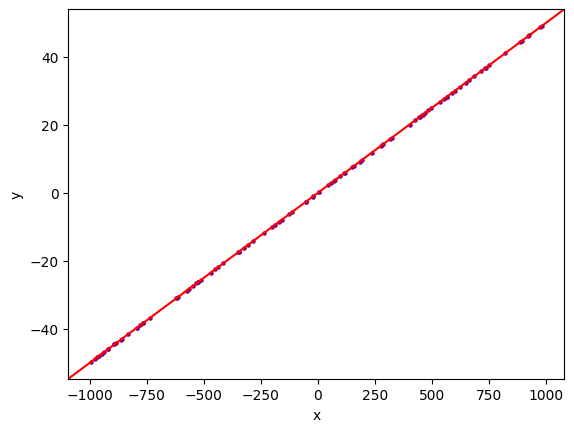

In [ ]:
p1, p2, p3 = categorize_points(pointsIN_float, a, b, mat_det_3x3, 1e14)
print(len(p1), len(p2), len(p3))
draw_line(*categorize_points(pointsIN_float, a, b, mat_det_3x3, 1e14), s=5)